In [39]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dir_in_Lx = '../out/20.0518 Lx/L100only_reg_rf_boruta_all/'

y_compr_tr = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_tr.pkl'), 'rb'))
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

In [44]:
# np.random.seed(seed=25)
# def getDummyInfer(y):    
#     return np.random.uniform(-4.4923381539,3.9745784786800002, size=y.shape[0])

In [62]:
# from sklearn.dummy import DummyRegressor
# dummy_clf = DummyRegressor(quantile=0.5)
# y = y_compr_tr['actual']
# dummy_clf.fit([0]*(y.shape[0]*y.shape[1]), y.values.flatten())
# def getDummyInfer(y):
#     return dummy_clf.predict([0]*y.shape[0])

In [77]:
from sklearn.dummy import DummyRegressor
def getDummyInfer(y):
    dummy_clf = DummyRegressor(quantile=0.5)
    dummy_clf.fit([0]*y.shape[0], y)
    return dummy_clf.predict([0]*y.shape[0])

In [78]:
y_pred = y_compr_tr['actual'].apply(getDummyInfer, axis=0)

In [79]:
y_pred.head(3)

,IFNA6,CES4A,ABI1,LCTL,MICALL2,LCE3D,SURF2,ICA1L,NDUFAF1,ZNF639,...,PCDH7,TRAPPC3,MRPL36,RPL15,MICAL2,HTR1A,PITPNB,BCL2L1,HOXA5,FIS1
0,0.160633,-0.194269,-0.060531,-0.055636,-0.056057,-0.009201,0.00678,0.100379,-0.40773,0.014535,...,-0.060736,-1.376245,-0.61429,-1.159696,0.051005,0.002483,0.021995,-0.940629,-0.204013,-0.485109
1,0.160633,-0.194269,-0.060531,-0.055636,-0.056057,-0.009201,0.00678,0.100379,-0.40773,0.014535,...,-0.060736,-1.376245,-0.61429,-1.159696,0.051005,0.002483,0.021995,-0.940629,-0.204013,-0.485109
2,0.160633,-0.194269,-0.060531,-0.055636,-0.056057,-0.009201,0.00678,0.100379,-0.40773,0.014535,...,-0.060736,-1.376245,-0.61429,-1.159696,0.051005,0.002483,0.021995,-0.940629,-0.204013,-0.485109


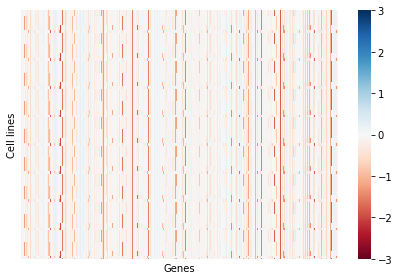

In [80]:
plt.figure()
ax = sns.heatmap(y_pred, yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

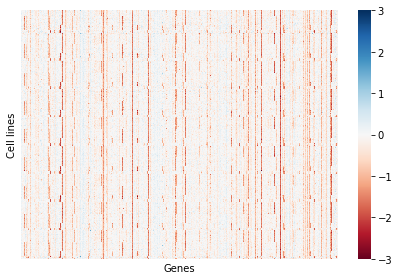

In [81]:
plt.figure()
ax = sns.heatmap(y_compr_tr['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

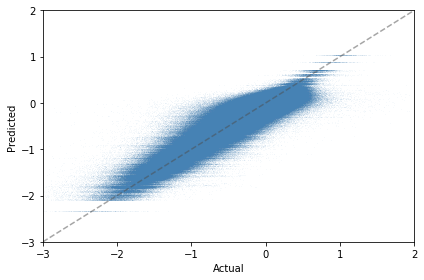

In [90]:
plt.figure()
plt.plot([-3,2], [-3,2], ls="--", c=".3", alpha=0.5)
ax = sns.scatterplot(y_compr_tr['actual'].values.flatten(), y_pred.values.flatten(),
                     s = 1, alpha=0.05, linewidth=0, color='steelblue')
ax.set(xlabel='Actual', ylabel='Predicted', xlim=[-3,2], ylim=[-3,2])
plt.tight_layout()

In [92]:
from scipy.stats import pearsonr
pearsonr(y_compr_tr['actual'].values.flatten(), y_pred.values.flatten())

(0.9222905637349154, 0.0)

Dummy regressor by simply predicting median has an overall pearson correlation of 0.922. With a random forest (and boruta etc), the pearson correlation is 0.946.